<a href="https://colab.research.google.com/github/eDuque2003/Proyecto-final/blob/main/Proyecto_final_Analitica_de_negocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelo de clasificación de especies de acuerdo con sus características anatómicas (largo, peso y relación Largo/Peso)**

1. Importación de librerías para pe-procesar los datos, modelar, extraer datos de rendimiento del modelo y proveer información sobre los datos.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Importar base de datos a partir del CSV.

In [6]:
Df=pd.read_csv('/content/drive/MyDrive/Analitica de negocios/fish_data.csv')
Df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [7]:
print(Df.info(),' \n',)
print('\n La distribución de las variables numéricas se ubica de la siguiente manera: \n', Df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None  


 La distribución de las variables numéricas se ubica de la siguiente manera: 
             length       weight    w_l_ratio
count  4080.000000  4080.000000  4080.000000
mean     17.353544     3.739875     0.252782
std       7.114684     1.040365     0.123046
min       6.360000     2.050000     0.080000
25%      11.327500     3.070000     0.170000
50%      17.350000     3.310000     0.190000
75%      22.585000     4.100000     0.340000
max      33.860000     6.290000     0.640000


3. Se procede con el análisis exploratorio de los datos a través de un diagrama de pares, denotando la relación entre las variables y las especies.

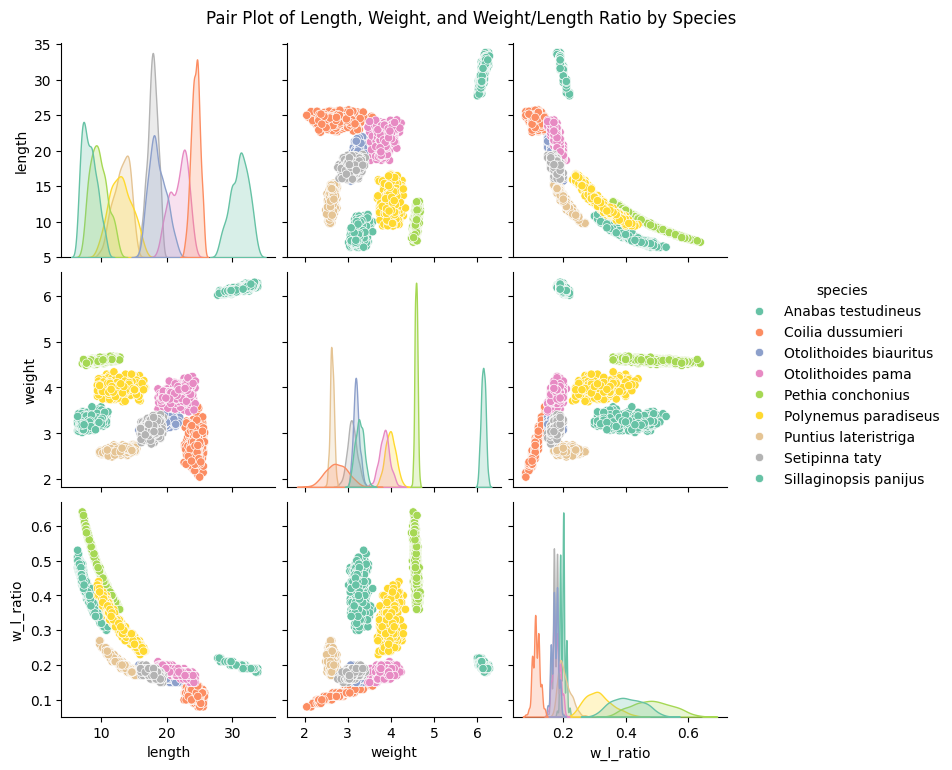

In [8]:
# Diagrama de pares.
sns.pairplot(Df, vars=['length', 'weight', 'w_l_ratio'], hue='species', palette='Set2')
plt.suptitle("Pair Plot of Length, Weight, and Weight/Length Ratio by Species", y=1.02)
plt.show()

Preprocesamiento de datos, codificando las especies para poder emplear el modelo y generar las predicciones adecuadamente

In [9]:
le = LabelEncoder()
Df['species_encoded'] = le.fit_transform(Df['species'])

# Separación de variables
X = Df[['length', 'weight', 'w_l_ratio']]
y = Df['species_encoded']

In [10]:
# Separación de datos con distribución 70/30 para entrenamiento y prueba, semilla de 42 para reproducibilidad.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5. Creación de modelos de predicción (KNN y K-Means)

Selección del hiperparámetro n_neighbors para el modelo KNN analizando la convergencia del error.

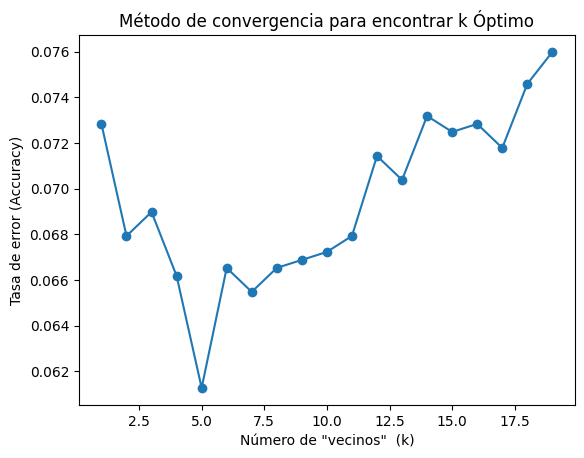

Con lo anterior, el mejor K es  5


In [11]:
# Range of k values to test
k_values = range(1, 20)
cv_scores = []

# Perform cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # Adjust cv as needed
    cv_scores.append(scores.mean())

# Plot the error rate vs. k values
plt.plot(k_values, [1 - score for score in cv_scores], marker='o')
plt.xlabel('Número de "vecinos"  (k)')
plt.ylabel('Tasa de error (Accuracy)')
plt.title('Método de convergencia para encontrar k Óptimo')
plt.show()

# Find the best k
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Con lo anterior, el mejor K es  {best_k}")

In [12]:
# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir en el set de prueba
y_pred_knn = knn.predict(X_test)

In [13]:
# Crear modelo K-Means con n_cluster= al número de especies
kmeans = KMeans(n_clusters=len(le.classes_), random_state=42)
kmeans.fit(X)

# Predecir y crear clusters
kmeans_labels = kmeans.predict(X)
Df['kmeans_cluster'] = kmeans_labels

6. Evaluar rendimiento empleando un mapa de calor y la matriz de confusión para el modelo KNN

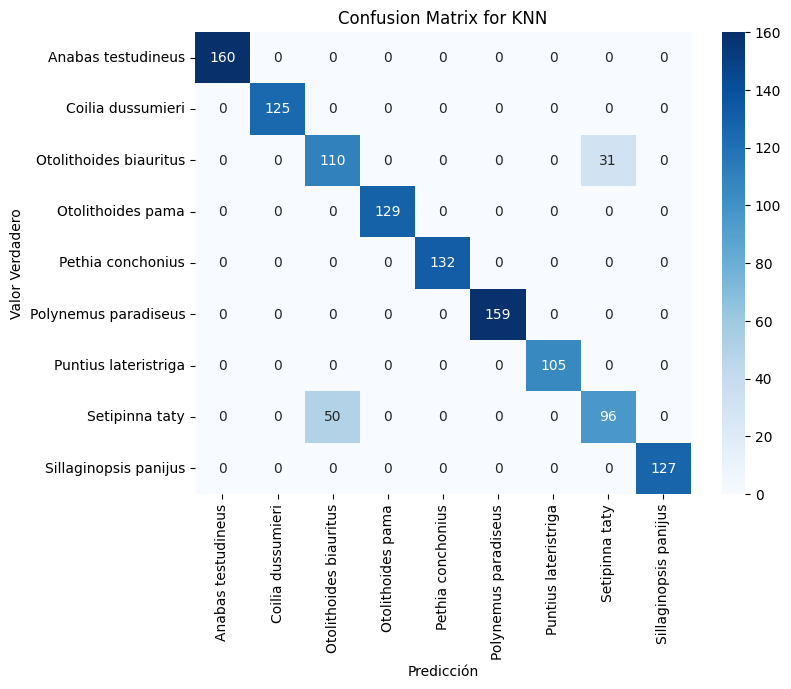


Overall Performance Metrics:
Classification Report:
                         precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00       160
     Coilia dussumieri       1.00      1.00      1.00       125
Otolithoides biauritus       0.69      0.78      0.73       141
     Otolithoides pama       1.00      1.00      1.00       129
     Pethia conchonius       1.00      1.00      1.00       132
  Polynemus paradiseus       1.00      1.00      1.00       159
  Puntius lateristriga       1.00      1.00      1.00       105
        Setipinna taty       0.76      0.66      0.70       146
 Sillaginopsis panijus       1.00      1.00      1.00       127

              accuracy                           0.93      1224
             macro avg       0.94      0.94      0.94      1224
          weighted avg       0.93      0.93      0.93      1224

Overall Accuracy of KNN Model: 0.9338235294117647


In [14]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Graficar matriz de confusión con la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Valor Verdadero")
plt.title("Confusion Matrix for KNN")
plt.show()

# Reporte de rendimiento y precisión
species_list = le.classes_
print("\nOverall Performance Metrics:")
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=species_list))
print("Overall Accuracy of KNN Model:", accuracy_score(y_test, y_pred_knn))

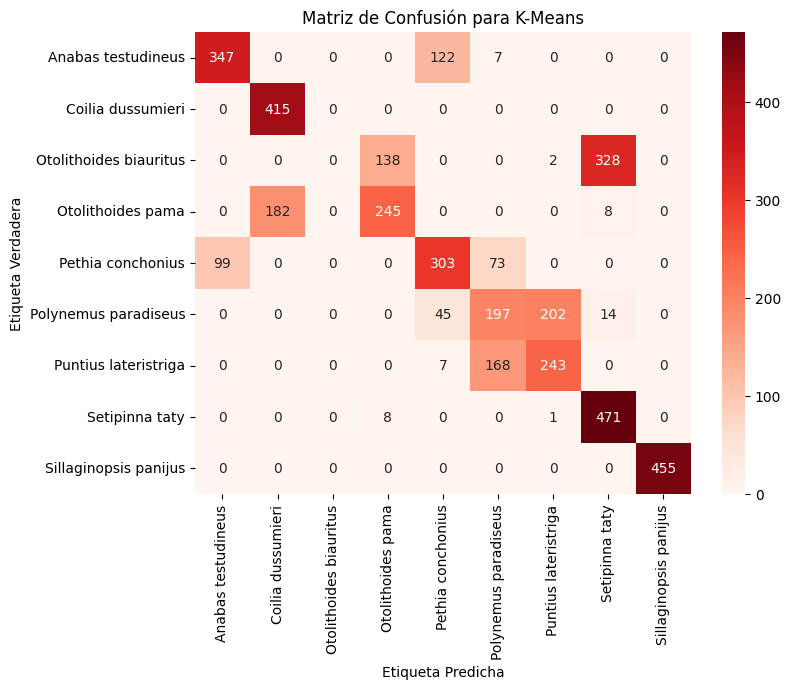

Reporte de Clasificación para K-means:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       476
           1       0.70      1.00      0.82       415
           2       0.00      0.00      0.00       468
           3       0.63      0.56      0.59       435
           4       0.64      0.64      0.64       475
           5       0.44      0.43      0.44       458
           6       0.54      0.58      0.56       418
           7       0.57      0.98      0.72       480
           8       1.00      1.00      1.00       455

    accuracy                           0.66      4080
   macro avg       0.59      0.66      0.61      4080
weighted avg       0.59      0.66      0.61      4080

Precisión de K-means: 0.6558823529411765


In [15]:
# Mapeo de las etiquetas predichas (clusters) a las etiquetas verdaderas
# Crear un diccionario para mapear los clusters a las clases verdaderas
cluster_to_class = {}
for cluster in range(kmeans.n_clusters):
    # Obtener los índices de los puntos pertenecientes al cluster actual
    cluster_indices = np.where(kmeans_labels == cluster)[0]

    # Obtener las etiquetas verdaderas de los puntos en el cluster actual
    cluster_labels = y[cluster_indices]

    # Encontrar la etiqueta más común en el cluster
    most_common_label = np.bincount(cluster_labels).argmax()
    cluster_to_class[cluster] = most_common_label

# Mapear las etiquetas de los clusters a las etiquetas verdaderas
y_pred_mapped = np.array([cluster_to_class[label] for label in kmeans_labels])

# Matriz de Confusión
conf_matrix_KNN = confusion_matrix(y, y_pred_mapped)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_KNN, annot=True, fmt="d", cmap="Reds",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión para K-Means")
plt.show()

# Reporte de Clasificación y Precisión
print("Reporte de Clasificación para K-means:\n", classification_report(y, y_pred_mapped, zero_division=0))
print("Precisión de K-means:", accuracy_score(y, y_pred_mapped))

7. Mostrar los diagramas con la clasificación final de cada modelo

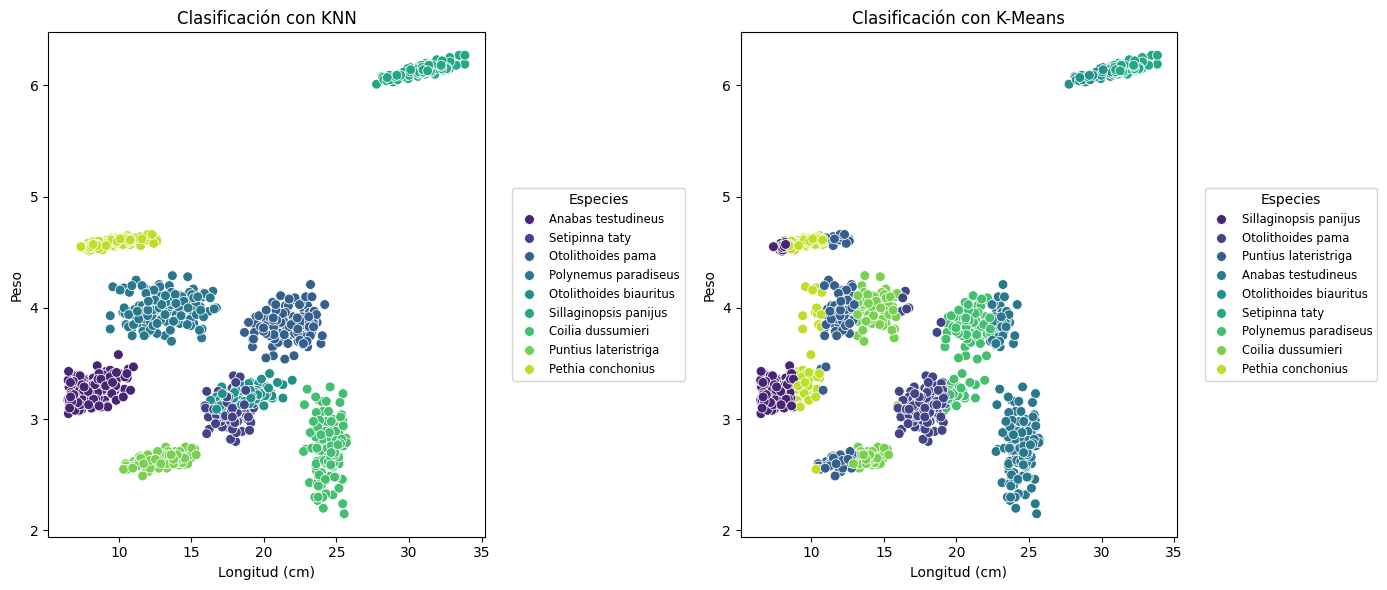

In [16]:
# Obtener los valores de prueba del K-Means
kmeans_labels_test = kmeans_labels[y_test.index]

# Crear Df test con los valores de prueba solamente
Df_test = Df.iloc[y_test.index].copy()

#Asignar predicciones a Df_test
Df_test['knn_predicted'] = y_pred_knn
Df_test['kmeans_predicted'] = kmeans_labels_test

# Decodificar las predicciones de KNN y KMeans para mostrar las especies en texto en lugar de números
knn_species = le.inverse_transform(Df_test['knn_predicted'])
kmeans_species = le.inverse_transform(Df_test['kmeans_predicted'])

# Asignar las etiquetas decodificadas al DataFrame de prueba
Df_test['knn_species'] = knn_species
Df_test['kmeans_species'] = kmeans_species

# Graficar el conjunto de prueba con seaborn
plt.figure(figsize=(14, 6))

# Graficar los resultados de KNN
plt.subplot(1, 2, 1)
sns.scatterplot(data=Df_test, x='length', y='weight', hue='knn_species', palette='viridis', s=50, legend='full')
plt.title("Clasificación con KNN")
plt.ylabel("Peso")
plt.xlabel("Longitud (cm)")
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', title="Especies", fontsize='small')

# Graficar los resultados de K-Means
plt.subplot(1, 2, 2)
sns.scatterplot(data=Df_test, x='length', y='weight', hue='kmeans_species', palette='viridis', s=50, legend='full')
plt.title("Clasificación con K-Means")
plt.xlabel("Longitud (cm)")
plt.ylabel("Peso")

# Ajustar el layout

plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', title="Especies", fontsize='small')
plt.tight_layout()
plt.show()

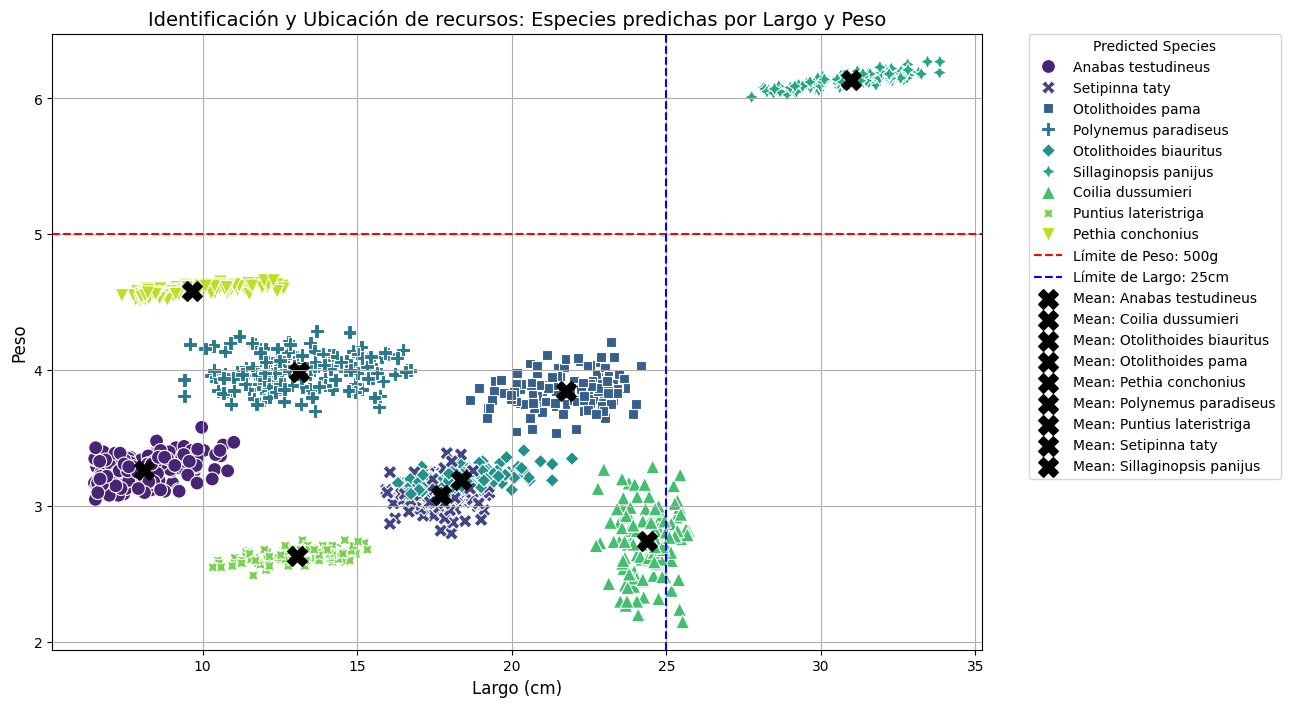

In [17]:
# Decodificar especies
decoded_species = le.inverse_transform(y_pred_knn)
plt.figure(figsize=(12, 8))

# Gráfico de dispersión de especies predichas
sns.scatterplot(
    x=X_test["length"],
    y=X_test["weight"],
    hue=decoded_species,
    palette="viridis",
    style=decoded_species,
    s=100,
    legend="full"
)

# Identificar zonas de tamaño/peso
plt.axhline(5, color="red", linestyle="--", label="Límite de Peso: 500g")
plt.axvline(25, color="blue", linestyle="--", label="Límite de Largo: 25cm")

# Identificar centroides
for species_label in np.unique(y_pred_knn):
    species_data = X_test[y_pred_knn == species_label]
    avg_length = species_data["length"].mean()
    avg_weight = species_data["weight"].mean()
    plt.scatter(avg_length, avg_weight, color="black", s=200, marker="X", label=f"Mean: {le.inverse_transform([species_label])[0]}")


plt.title("Identificación y Ubicación de recursos: Especies predichas por Largo y Peso", fontsize=14)
plt.xlabel("Largo (cm)", fontsize=12)
plt.ylabel("Peso", fontsize=12)
plt.legend(
    title="Predicted Species",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0,
    fontsize=10)
plt.grid(True)
plt.show()

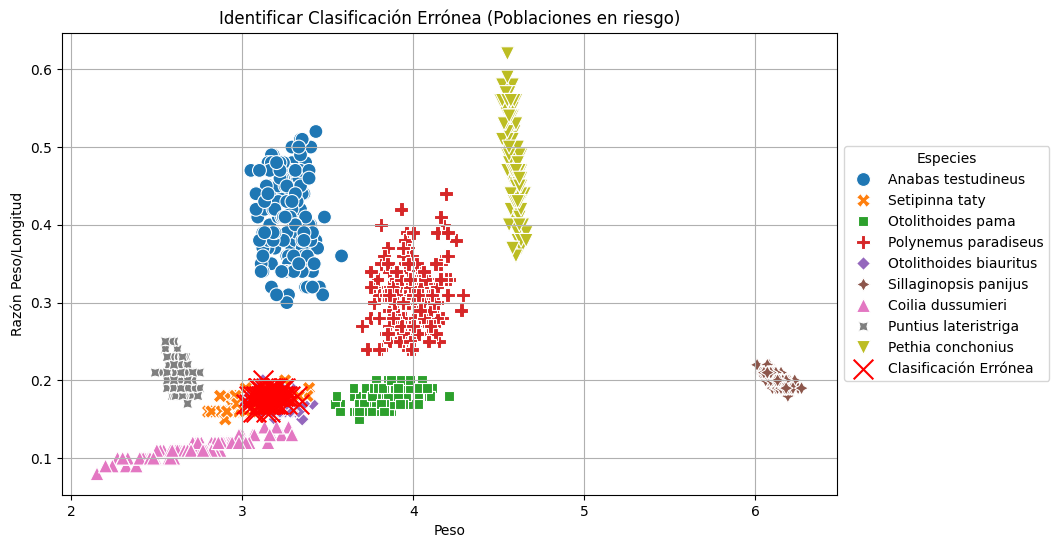

Información acerca de la Matriz de Confusión:
Especies 'Anabas testudineus': Clasificados Correctamente: 160/160 (100.00%)
Especies 'Coilia dussumieri': Clasificados Correctamente: 125/125 (100.00%)
Especies 'Otolithoides biauritus': Clasificados Correctamente: 110/141 (78.01%)
Especies 'Otolithoides pama': Clasificados Correctamente: 129/129 (100.00%)
Especies 'Pethia conchonius': Clasificados Correctamente: 132/132 (100.00%)
Especies 'Polynemus paradiseus': Clasificados Correctamente: 159/159 (100.00%)
Especies 'Puntius lateristriga': Clasificados Correctamente: 105/105 (100.00%)
Especies 'Setipinna taty': Clasificados Correctamente: 96/146 (65.75%)
Especies 'Sillaginopsis panijus': Clasificados Correctamente: 127/127 (100.00%)


In [18]:
# Goal 2: Identificación de especies en peligro de extinción
# Encontrar clasificaciones erróneas
misclassified_indices = np.where(y_test != y_pred_knn)[0]
misclassified_data = X_test.iloc[misclassified_indices]

# Decodificar
decoded_y_test = le.inverse_transform(y_test)
decoded_y_test = pd.Series(decoded_y_test, index=y_test.index, name="True Species")

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_test["weight"],
    y=X_test["w_l_ratio"],
    hue=decoded_y_test,
    palette="tab10",
    style=decoded_y_test,
    s=100,
    legend="full"
)

# Gráfico de dispersión de clasificación errónea
plt.scatter(
    misclassified_data["weight"],
    misclassified_data["w_l_ratio"],
    color="red",
    label="Clasificación Errónea",
    marker="x",
    s=200
)
plt.title("Identificar Clasificación Errónea (Poblaciones en riesgo)")
plt.xlabel("Peso")
plt.ylabel("Razón Peso/Longitud")
plt.legend(title="Especies", loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

# Información de la Matriz de Confusión
print("Información acerca de la Matriz de Confusión:")
for i, species in enumerate(species_list):
    correct_classifications = conf_matrix[i, i]
    total_true = sum(conf_matrix[i, :])
    accuracy_for_species = correct_classifications / total_true if total_true > 0 else 0
    print(f"Especies '{species}': Clasificados Correctamente: {correct_classifications}/{total_true} "
          f"({accuracy_for_species:.2%})")